## Support Vector Machine (SVM)
SVM is a supervised machine learning algorithm which can be used for both classification and regression problems, however it is mostly preferred for classification. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) and our main objective is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen. But our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence. <br>
> For examlpe in below image we can see that we had plenty of choices for classification hyperplane but we choosed the one which had higher marignal distance.
<img src="https://miro.medium.com/max/600/0*9jEWNXTAao7phK-5.png" width="300" height="200">
<img src="https://miro.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png" width="300" height="200"> <br>
This is one more example depacting the difference between high and low marginal distance <br>
<img src="https://miro.medium.com/max/875/0*ecA4Ls8kBYSM5nza.jpg" width="600" height="400">

We always don't have linearly seaprable data, so on that case SVM tranform our data points into higher dimension and then it tries to find the best decision boundaries (hyperplane). And to find best transformation for better classification SVM uses something called kernal for eg polynomial kernel and radial kernel, these kernal finds the relation between each data points and finds the best hyperplane to separates different classes. <br>
for example in below example, these data is not linearly separable
> 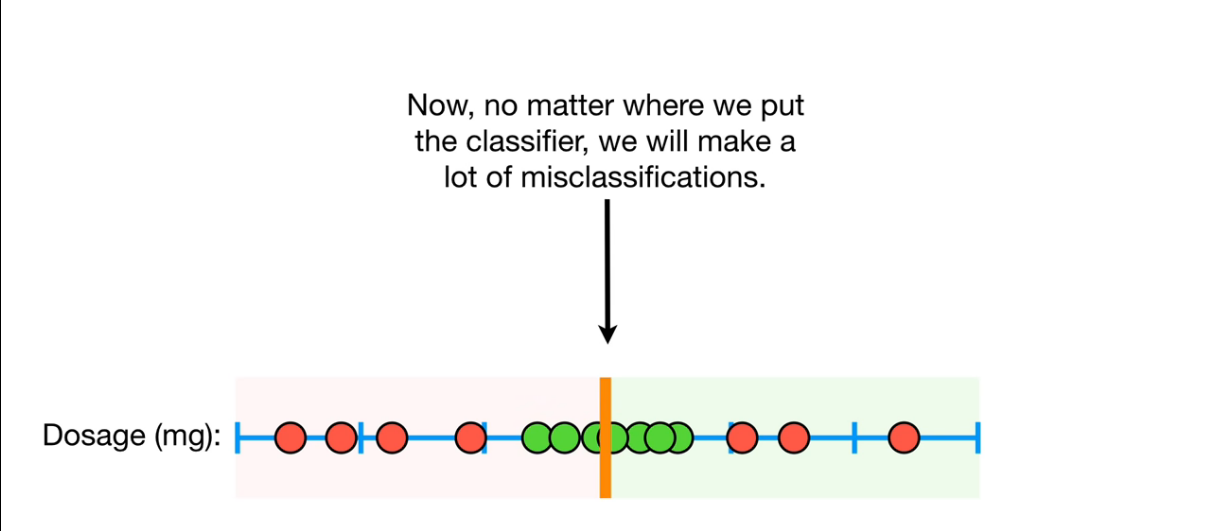

so we will transform these data into higher dimension and then we will find best support vector classifier to create our hyper plane. In our example we tranformed our data into 2nd dimension just by squaring each data points and our coordinates became (x=our original data points values, y=squared data points values).
> 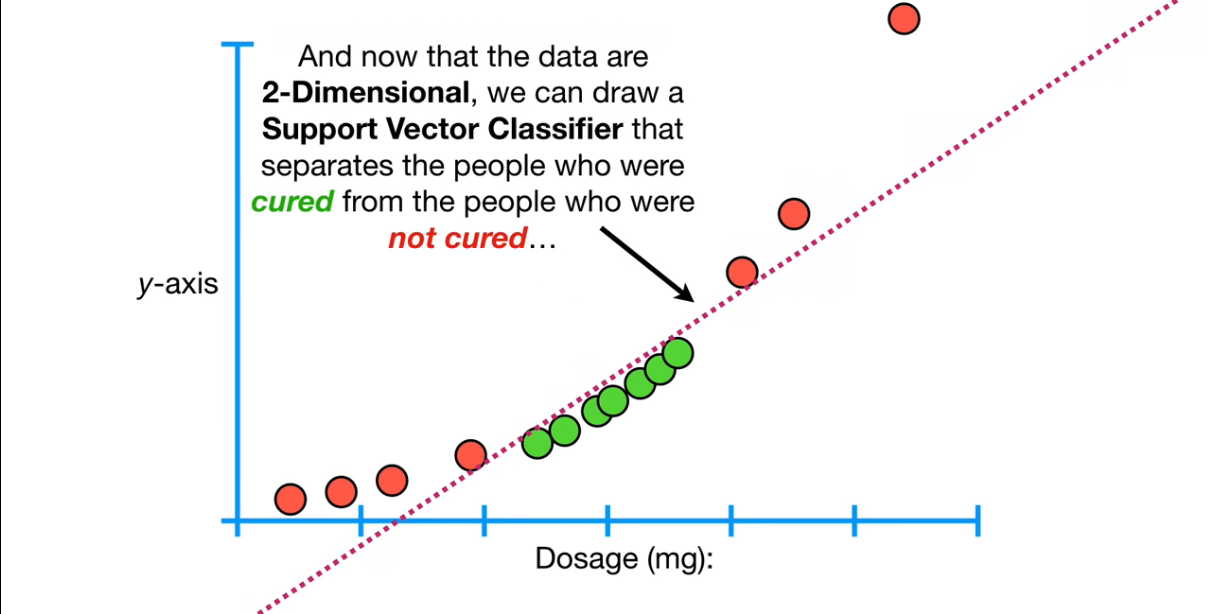

Now question aries why we tranformed our data into 2nd dimension not on 3rd or ndimension. So Actually this is done by our kernel which calculates the relation of each data points with each other and find the best support vector classifier (hyperplane) in different dimensions. For example in polynomial kernel we have a parameter called `d` which stands for degree of polynomial, when we have the value of d as 1 then it calculates the realtion of each data points with each other and finds the best support vector classifier in 1 dimension, when value of d is 2 it tries these in 2nd dimension and similary in 3rd dimension for the value of d as 3 and so on. Now to find the optimal value of d we can use cross validation.

> 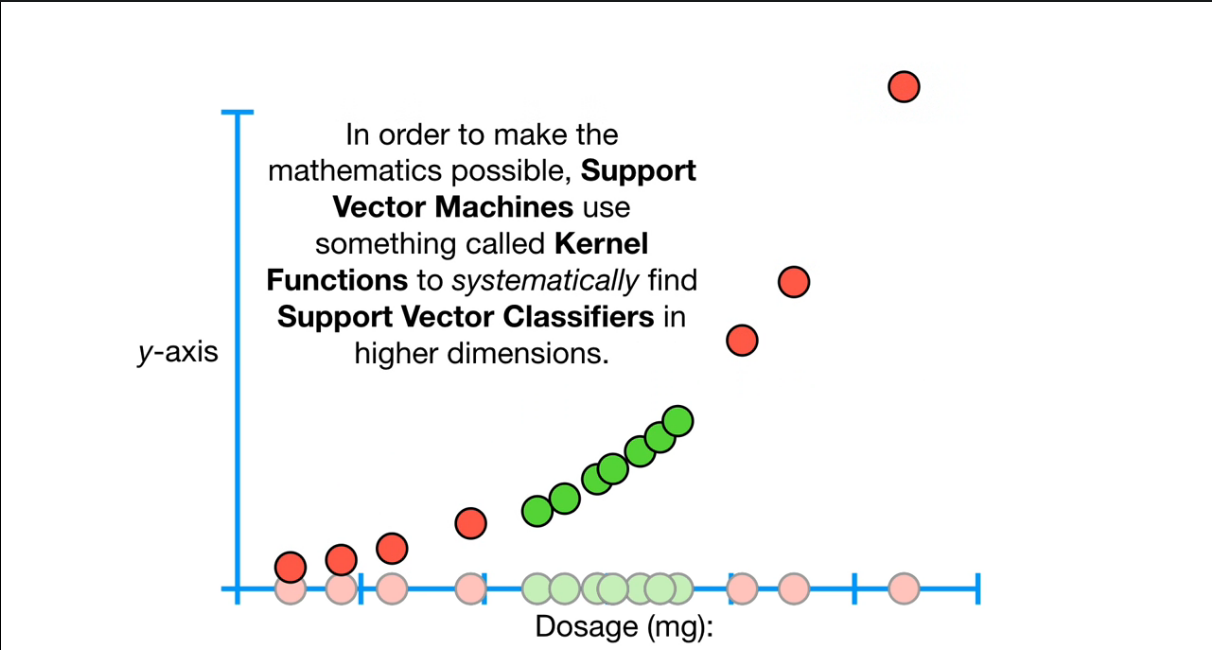
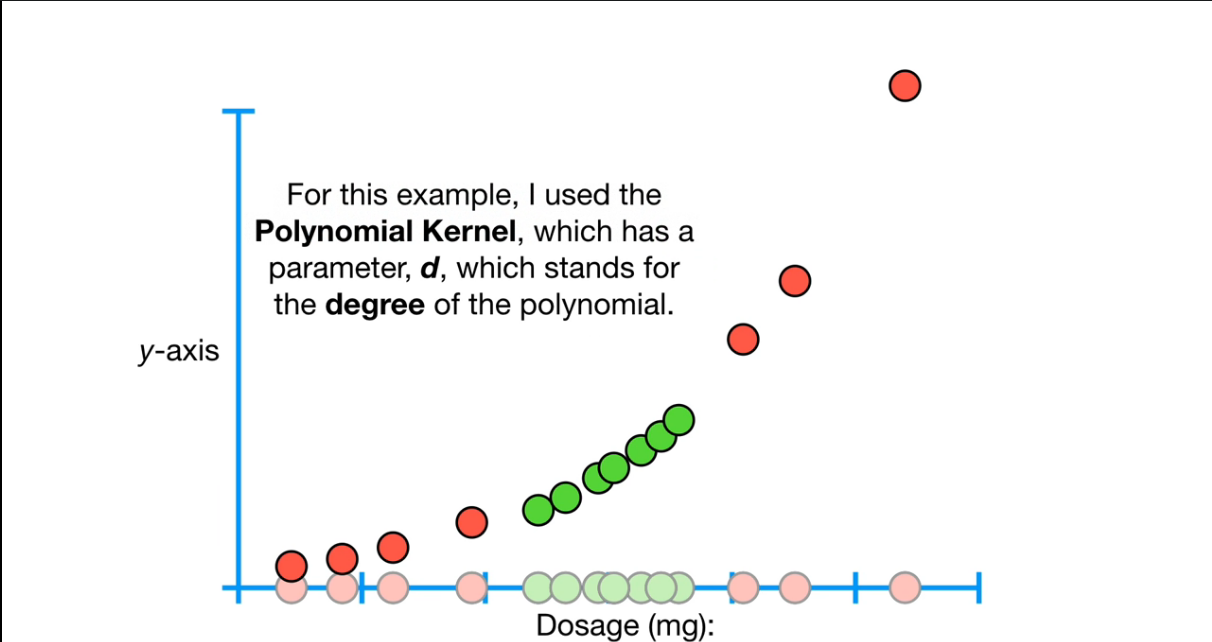
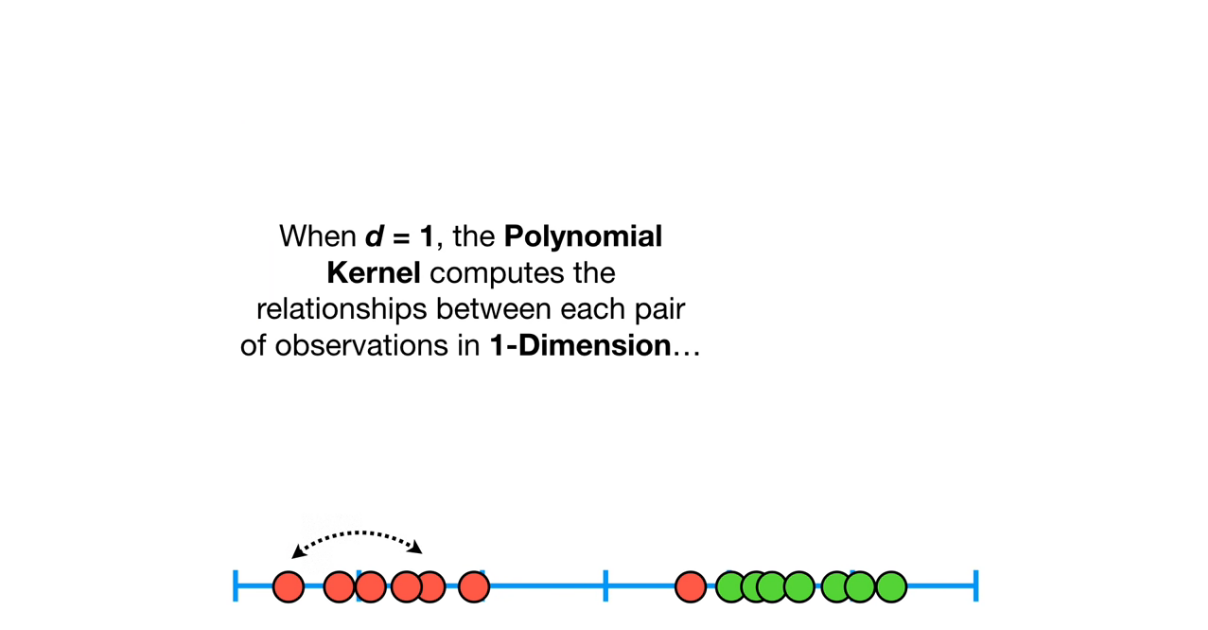
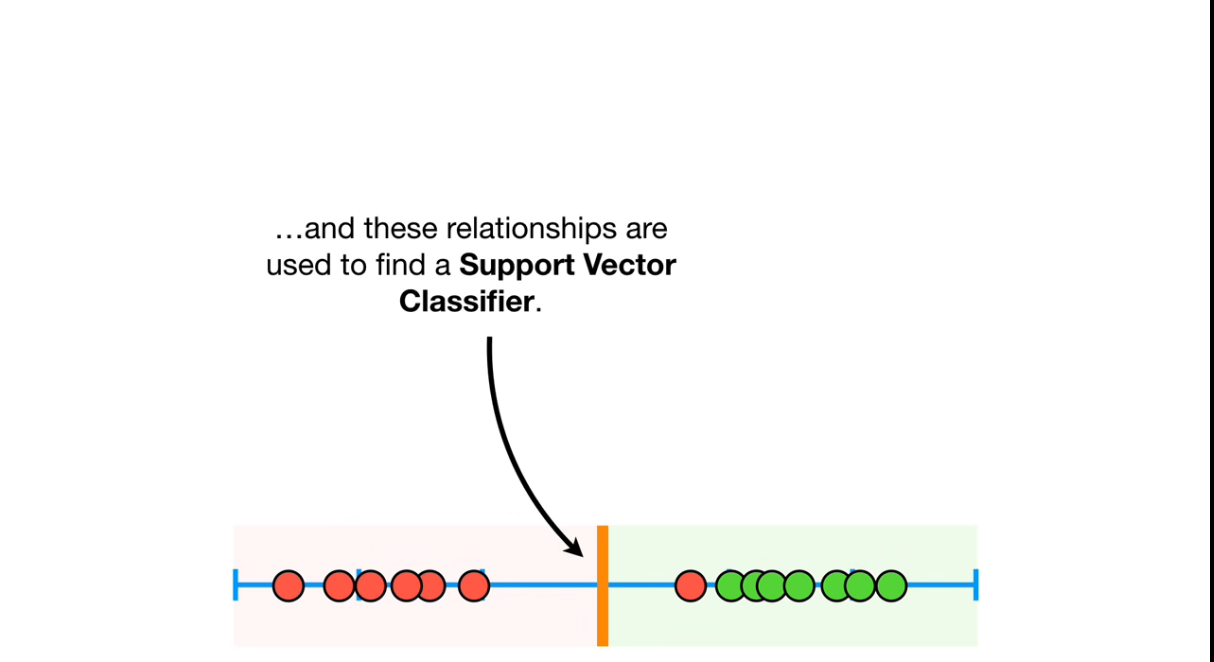
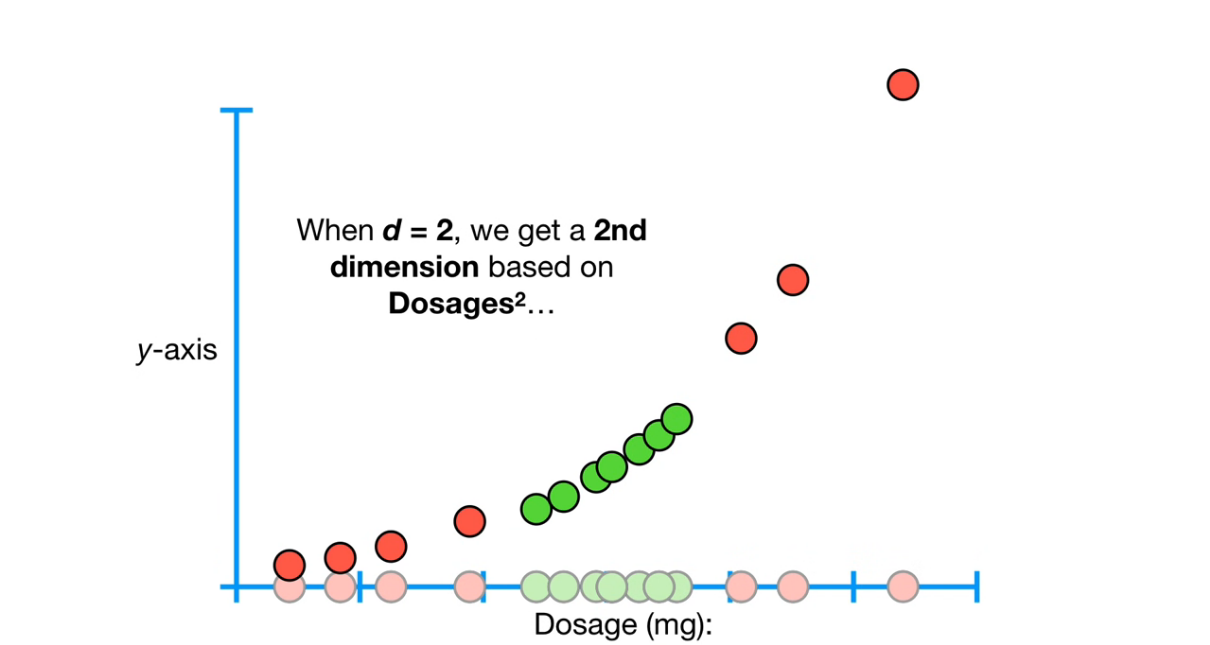
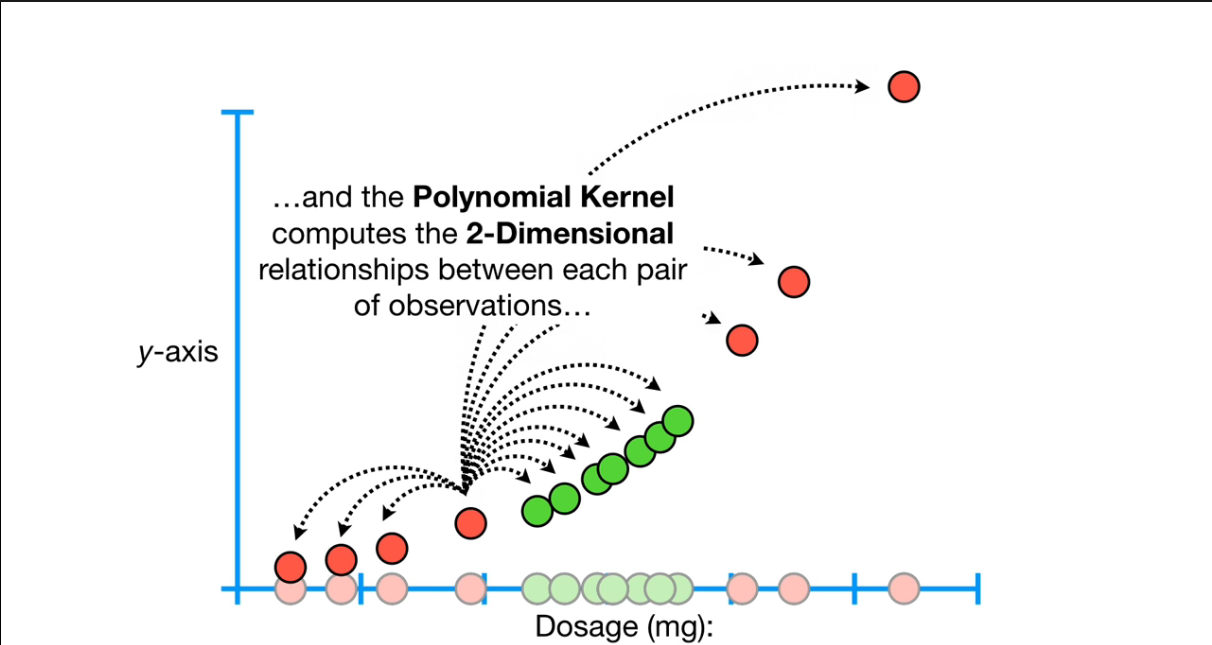
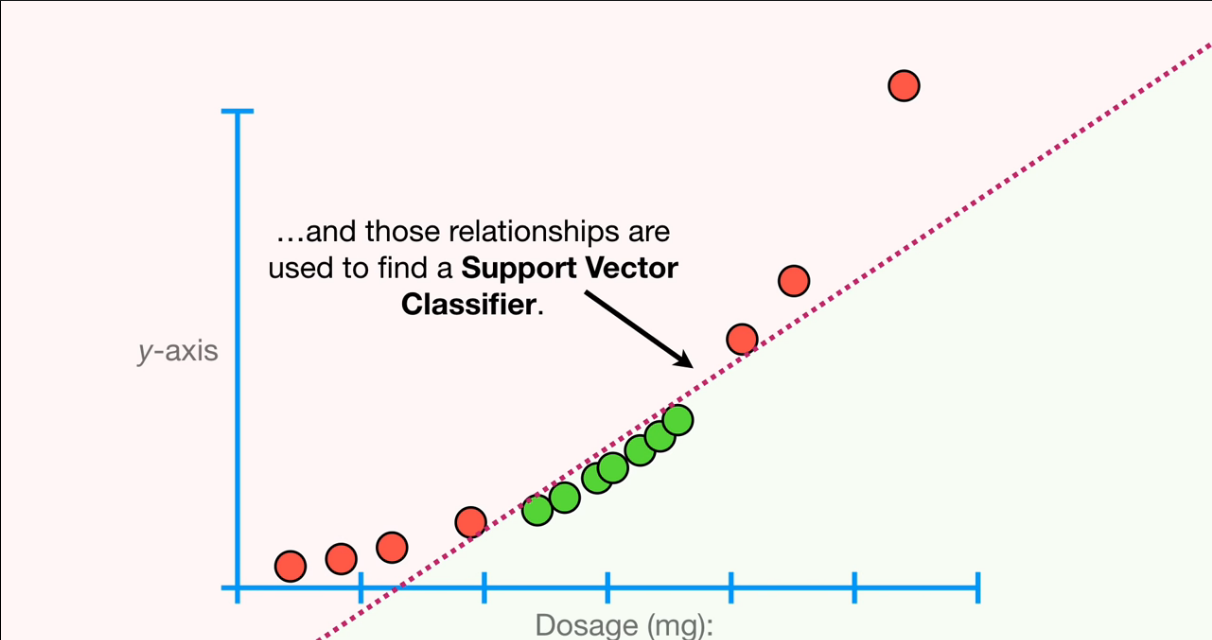

### Important Terminologies and facts
#### What is Margin?
Margin is the total distance from the closest point of each class or the distance between the closest point of each class from the hyperplane(threshold).
> 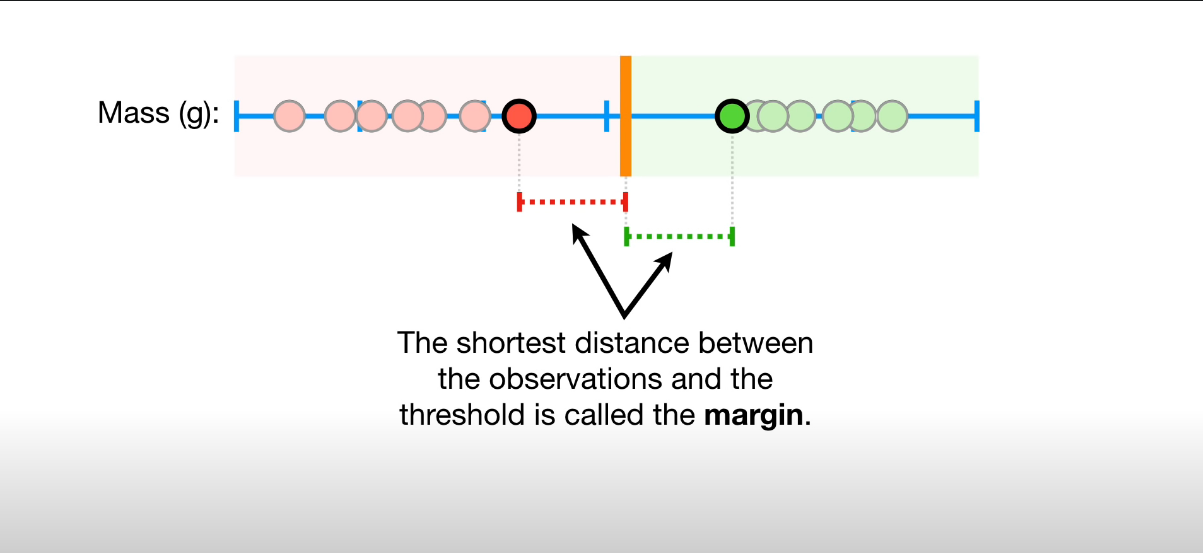
#### What is Maximum Margin Classifier
The maximum distance between the closest values of each class from the threshold is callded maximum margin classifier. It is very sensitive to outlier so it is not a good classifier.
> 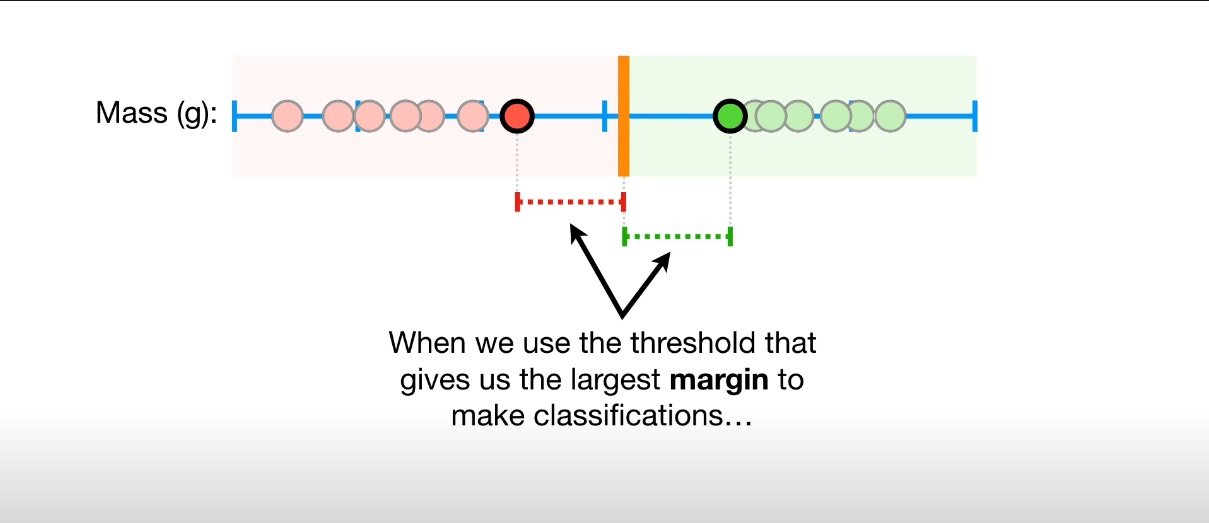
#### What is soft margin and support vector classifier
When we allow missclassification inside the margin it is called soft margin. We does that for balancing bias and variance. And to decide best soft margin for less bias we can use cross validation and when we decide the value of threshold with the help of soft margin then we call it soft margin classifier aka support vector classifier. 
> 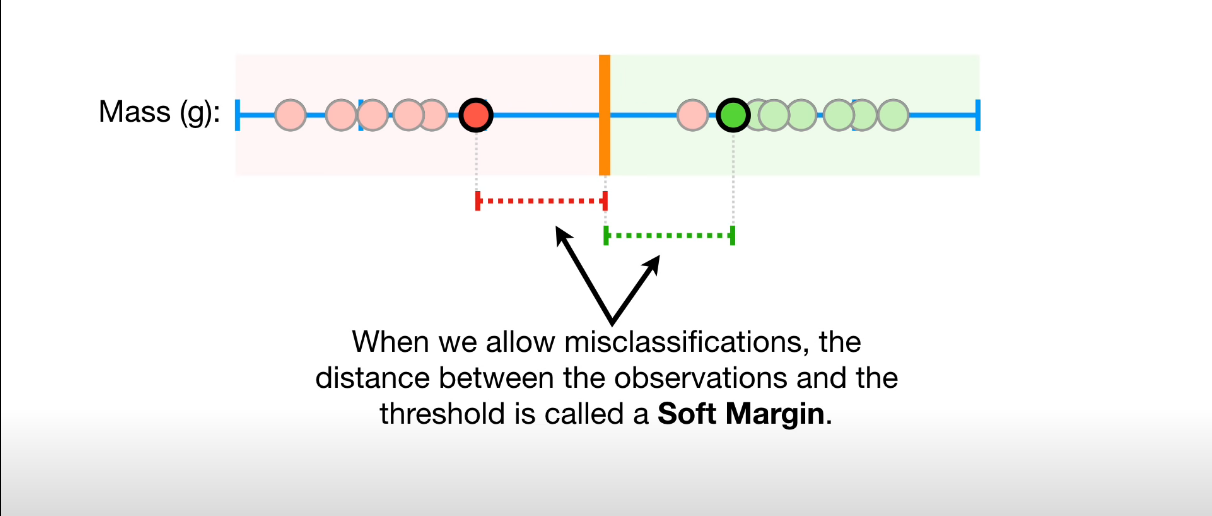
#### What is hyperplane?
Hyperplane is nothing but the threshold we use to separate different classes, And when it is decided by the soft margin it is called support vector classifier. For instance below is the two example of hyperplane in 2D and 3D classification
> 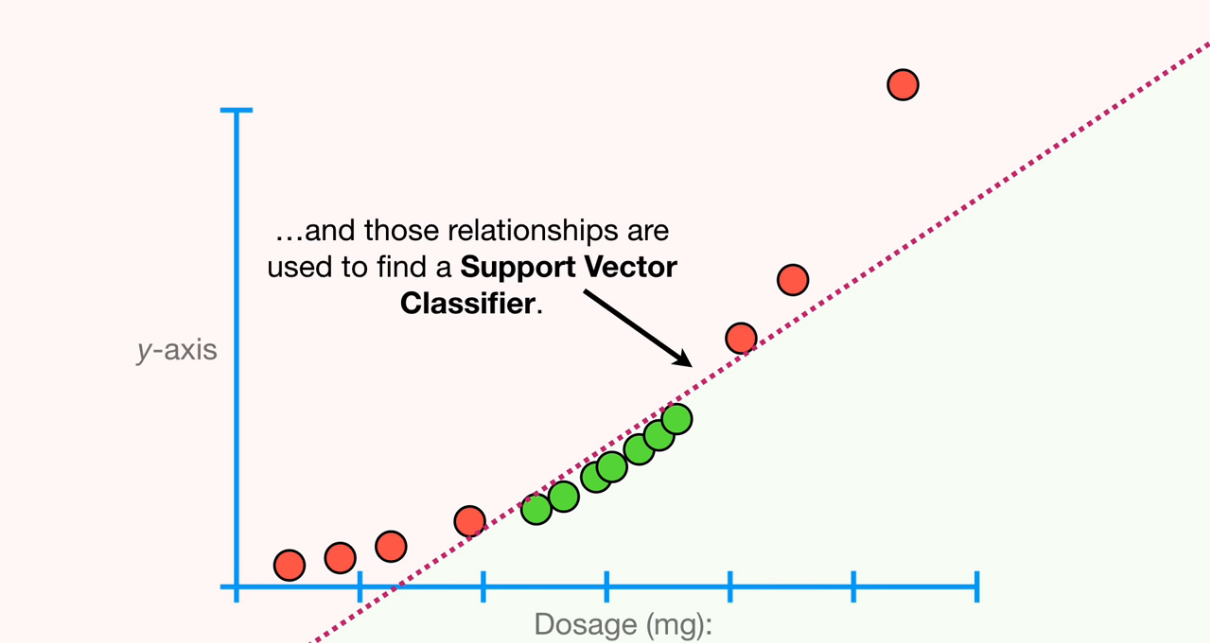
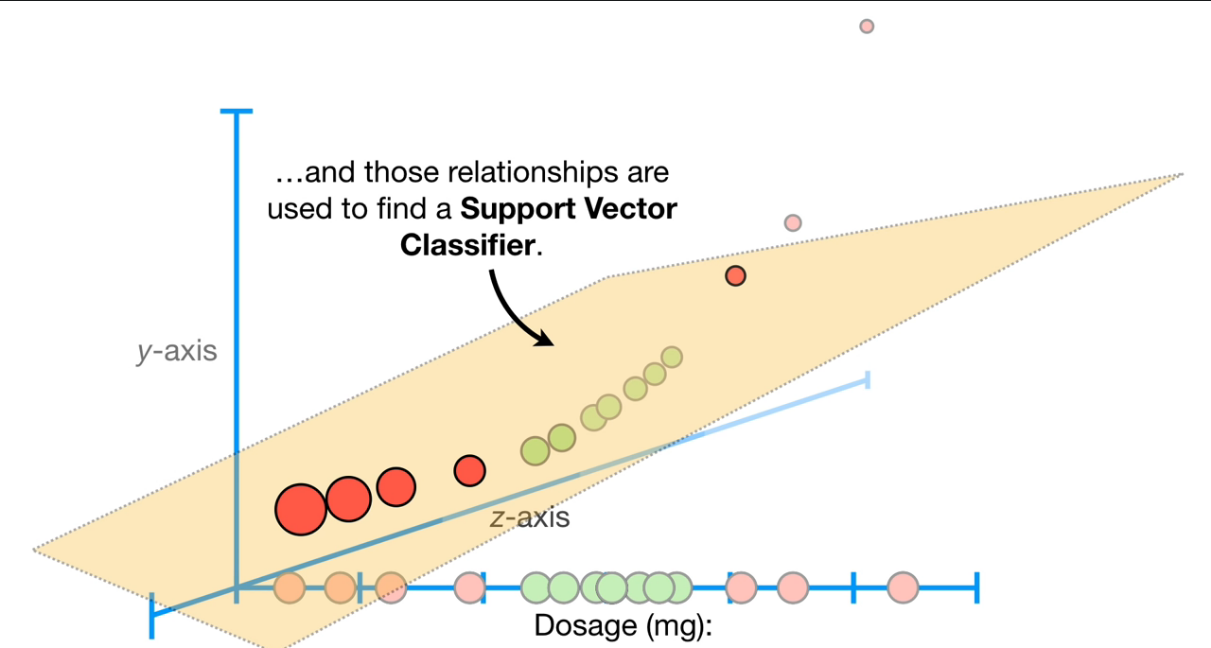

#### What is support vectors in support vector machine?
The closest points of any class from the hyperplane(threshold) is support vectors, it is used for creating margin boundaries.
> <img src="https://www.mitosistech.com/mitosis/uploads/2020/02/SVM.jpg" width="600" height="400">

## Building SVM Model

In [1]:
import pandas as pd # <-- for handling data
from sklearn.datasets import load_breast_cancer # <-- dataset we will be working on
from sklearn.svm import SVC # <-- for building svm model
from sklearn.model_selection import train_test_split # <-- for spliting dataset
from sklearn.metrics import confusion_matrix, classification_report # <--- for evaluation

In [2]:
data = load_breast_cancer()

# creating data frame 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['type'] = data.target

In [3]:
df.sample(10, random_state=21)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.05948,...,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592,1
147,14.950,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,0.1744,0.06493,...,25.47,107.10,809.7,0.09970,0.25210,0.25000,0.08405,0.2852,0.09218,1
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
77,18.050,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673,...,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0
339,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,0.1797,0.05506,...,30.73,202.40,2906.0,0.15150,0.26780,0.48190,0.20890,0.2593,0.07738,0
319,12.430,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,0.05561,...,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932,1
506,12.220,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,24.17,85.13,515.3,0.14020,0.23150,0.35350,0.08088,0.2709,0.08839,1
55,11.520,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,0.05907,...,22.47,81.81,506.2,0.12490,0.08720,0.09076,0.06316,0.3306,0.07036,1
539,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,0.2037,0.07751,...,31.89,54.49,223.6,0.15960,0.30640,0.33930,0.05000,0.2790,0.10660,1
347,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,...,17.93,114.20,880.8,0.12200,0.20090,0.21510,0.12510,0.3109,0.08187,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# separating features and label
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

print(features.shape, label.shape)

(569, 30) (569,)


In [47]:
# splitting dataset
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=41)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [60]:
# let's create our model
model = SVC(kernel='linear', C=2)
model.fit(x_train, y_train)

SVC(C=2, kernel='linear')

In [61]:
# let's try predicting our test samples
y_pred = model.predict(x_test)

In [62]:
# let's see our testing result
confusion_matrix(y_test, y_pred)

array([[39,  1],
       [ 0, 74]], dtype=int64)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.99      1.00      0.99        74

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [64]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9604395604395605
0.9912280701754386


So SVM gave us 99% accuracy which is better than our last model Random forest.